# Covid-19 infection in Portugal
Mathematical models base on: [Covid-19 infection in Italy](https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d)

# Data 

In [1]:
data = {
    'start' : '2020/03/02',
    'cases' : [
            2,     4,     6,    9,     13,    21,    30,    39,    41,    59,
           78,   112,   169,   245,   331,   448,   642,   785,  1020,  1280, 
         1600,  2060,  2362,  2995,  3544,  4268,  5170,  5962,  6408,  7443,
         8251,  9034,  9886, 10524, 11278, 11730, 12442
    ]
}

# Models

In [2]:
from numpy import exp
from numpy import log

# logistic function
def linear_model(x, a, b, c):
    return c / (1 + exp(-(x - b) / a))

# log logistic function
def exponential_model(x, a, b, c):
    return c / (1 + exp(-(log(x) - b) / a))

# Regressions 

## Model Fit Function

In [3]:
def model_fit(model, x, y, n= 10, p = [2, 20, 200]):
    from scipy.optimize import curve_fit, fsolve
    from functools import partial

    fit_x, fit_p, fit_e = [], [], []
    for i in range(len(x), 0, -1):
        try :
            # process fit
            p, _ = curve_fit(model, x[:i], y[:i], p0=p, maxfev=1000)
            # process end
            fit_e.append(int(fsolve(lambda x : n + model(x, *p) - int(p[-1]), p[-2])))
            # cache  
            fit_x.append(i)
            fit_p.append(p)
        except:
            pass
    fit_x.reverse()
    fit_e.reverse()
    fit_p.reverse()
    # build a model
    fit_m = partial(model, a=fit_p[-1][0], b=fit_p[-1][1], c=fit_p[-1][2])
    # return 
    return (fit_m, fit_x, fit_e)

## Prepare Fit

In [4]:
# prepare data
y_past = data['cases']
x_past = range(len(y_past))

## Exponential Growth Fit
log logistic function

In [5]:
# exponential fit
exp_model, exp_x, exp_e = model_fit(exponential_model, x_past, y_past, 10)

## Linear Growth Fit

In [6]:
# linear fit
lin_model, lin_x, lin_e = model_fit(linear_model, x_past, y_past, 1, [4.0, 28.0, 14000.0])

# Regression Results  

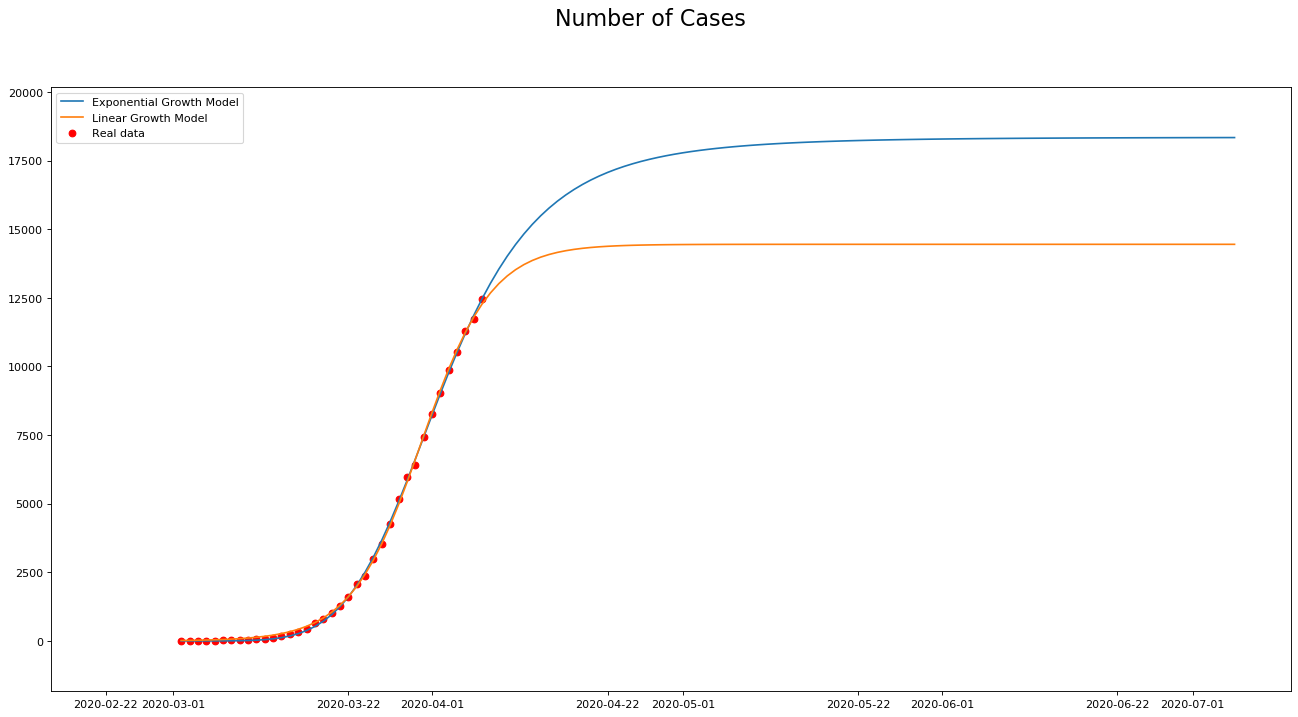

In [7]:
import matplotlib.pyplot as plt
import datetime          as dt
# figure
plt.figure('Regresion Results', figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

# start date
start_date = dt.datetime.strptime(data['start'], '%Y/%m/%d').date()

# epidemic duration
duration = max(lin_e[-1], exp_e[-1])

# number of cases
count    = max(lin_model(duration), exp_model(duration))

# Limits
plt.ylim(0 - 0.1 * count, count + 0.1 * count)

# Real data
x_date_past = [start_date + dt.timedelta(days=x) for x in x_past]
# Plot
plt.scatter(x_date_past, y_past, label="Real data", color="red")

# Time Line
x_date = [start_date + dt.timedelta(days=x) for x in range(duration)]

# Predicted exponetial curve
y_exp  = [exp_model(x) for x in range(duration)] 
# Plot   
plt.plot(x_date, y_exp, label="Exponential Growth Model")

# Predicted logistic curve
y_lin  = [lin_model(x) for x in range(duration)]
# Plot
plt.plot(x_date, y_lin, label="Linear Growth Model")

# Title
plt.suptitle('Number of Cases', fontsize=20)

# legend
plt.legend(loc='upper left')

# show
plt.show()

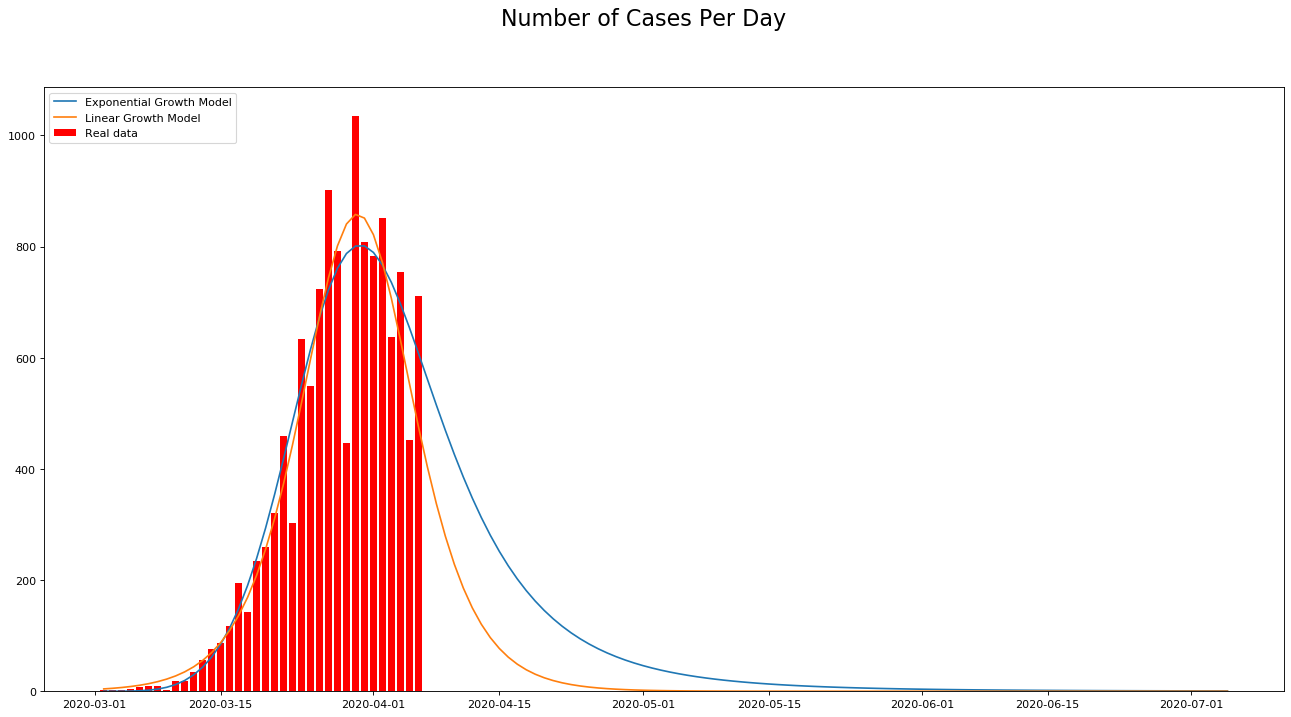

In [8]:
# Figure
plt.figure('Regresion Results', figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

# Real data
plt.bar(x_date_past[:-1], [t - s for s, t in zip(y_past, y_past[1:])], label="Real data", color="red")

# Predicted exponetial curve 
plt.plot(x_date[:-1], [t - s for s, t in zip(y_exp, y_exp[1:])], label="Exponential Growth Model")

# Predicted logistic curve
plt.plot(x_date[:-1], [t - s for s, t in zip(y_lin, y_lin[1:])], label="Linear Growth Model")

# Title
plt.suptitle('Number of Cases Per Day', fontsize=20)

# Legend
plt.legend(loc='upper left')

# Show
plt.show()

# Forecast Evolution 
## End of Epidemic

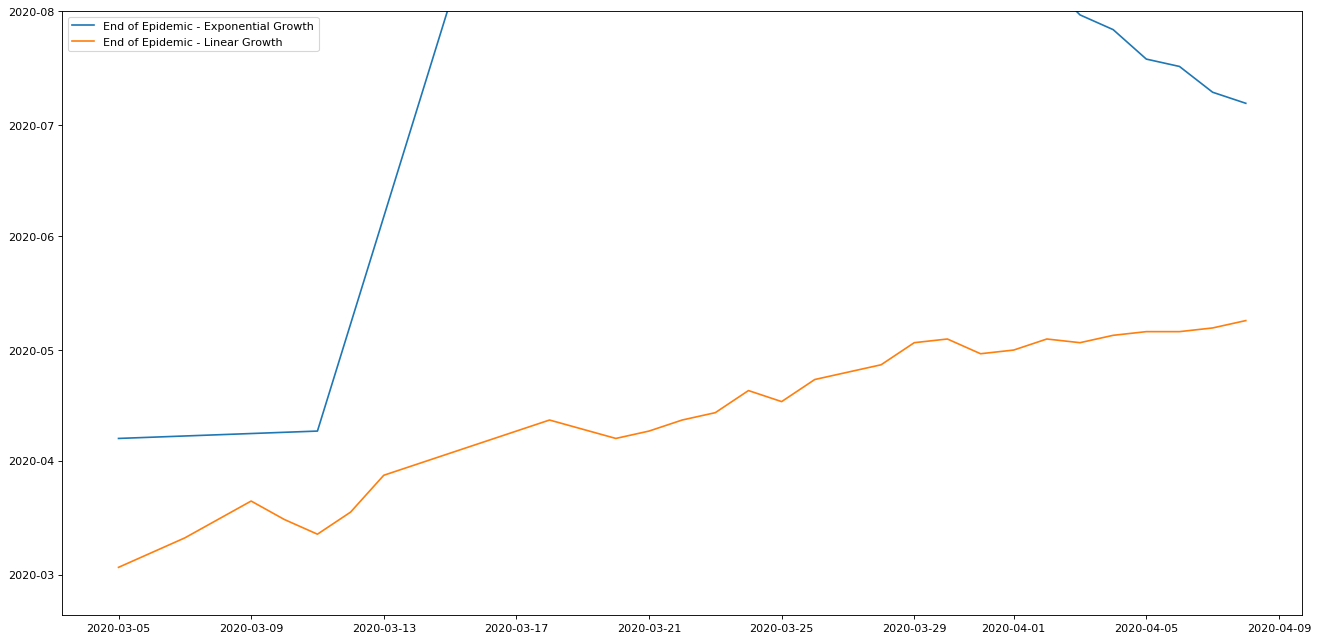

In [9]:
from IPython.display import Markdown, display

# figure
plt.figure('end of epidemic', figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

#end of epidemic evolution - exponential growth    
plt.plot(
    list(map(lambda x: start_date + dt.timedelta(days=x), exp_x)),
    list(map(lambda y: start_date + dt.timedelta(days=y), exp_e )) , label="End of Epidemic - Exponential Growth")

# end of epidemic evolution - linear growth     
plt.plot(
    list(map(lambda x: start_date + dt.timedelta(days=x), lin_x)),
    list(map(lambda y: start_date + dt.timedelta(days=y), lin_e )) , label="End of Epidemic - Linear Growth")

# Limits
top    = max(exp_e[-1], lin_e[-1])  
botton = min(exp_e[ 0], lin_e[ 0])  
plt.ylim(
    start_date + dt.timedelta(days=botton - top * 0.1),
    start_date + dt.timedelta(days=top    + top * 0.2))

# legend
plt.legend(loc='upper left')

# show
plt.show()


# Forecast

In [10]:
# forcast
display(Markdown(f'## Next Days'))
for x in range(max(x_past) + 1, duration)[:5]:
    date  = start_date + dt.timedelta(days=x)
    cases = ' - '.join([
        str(int(lin_model(x))), 
        str(int(exp_model(x)))])
    display(Markdown(f'- **{cases}** cases on {date.strftime("%A, %d %B %Y")}'))

# conclusion
date  = start_date + dt.timedelta(days=duration)
cases = exp_model(duration)
display(Markdown(f'## End of epidemic in **{date}** with **{int(cases)}** cases!'))

## Next Days

- **12677 - 13029** cases on Wednesday, 08 April 2020

- **13015 - 13544** cases on Thursday, 09 April 2020

- **13294 - 14013** cases on Friday, 10 April 2020

- **13522 - 14440** cases on Saturday, 11 April 2020

- **13708 - 14825** cases on Sunday, 12 April 2020

## End of epidemic in **2020-07-07** with **18336** cases!